
# PATC Courses 2021: Practical Introduction to Programming Artificial Intelligence
## Hands-on 1: Deep Learning Basics

In [4]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Load Data

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

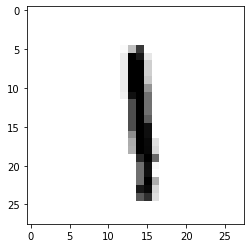

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [7]:
print(y_train[8])

1


In [8]:
print(x_train.ndim)

3


In [9]:
print(x_train.shape)

(60000, 28, 28)


In [10]:
print(x_train.dtype) 

uint8


## Prepare data

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical


In [15]:
print(y_test[0])

7


In [16]:
print(y_train[0])

5


In [17]:
print(y_train.shape)

(60000,)


In [18]:
print(x_test.shape)

(10000, 784)


In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
print(y_train.shape)

(60000, 10)


In [22]:
print(y_test.shape)

(10000, 10)


## Define Model

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Compile model (configuration)

In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## Training the model

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1068 - accuracy: 0.3503
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3936 - accuracy: 0.6637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0172 - accuracy: 0.7752
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8079 - accuracy: 0.8241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6898 - accuracy: 0.8428


## Evaluation the model

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.8567


In [28]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8567000031471252


In [29]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

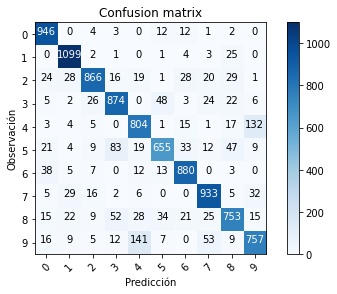

In [30]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Use the model 

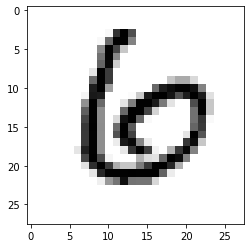

In [31]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [32]:
predictions = model.predict(x_test)

In [33]:
np.argmax(predictions[11])

6

In [34]:
print(predictions[11])

[0.16173895 0.01377307 0.17419532 0.01234447 0.10298719 0.05890866
 0.3978592  0.00376883 0.06723685 0.00718751]


In [35]:
np.sum(predictions[11])

1.0

### Your turn


* Create a better model (better Accuracy)
* Print the confusion matrix
* improvement applied: more epochs? new optimizer? more layers? more number of neurons per layer?